In [88]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

# Libraries that helps with statistical methods and visualizations
from  scipy import stats
from scipy.stats import norm
from scipy.stats import pearsonr
from statsmodels.formula.api import ols
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence as influence
from sklearn.tree import plot_tree

# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
import math
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Setting global constants to ensure notebook results are reproducible
TRAIN_TEST_VAR = 0.2 #Variable indicating the ratio of Training to Testing data when splitting datasets for validation
K_FOLD = 10 #Variable used during k-fold validation processes
RAND_STATE = 42 #Variable used to determine random state of methods in order to replicate model training results

In [89]:
df = pd.read_csv('C:\\Users\\HP\\OneDrive\\Documents\\df_train.csv')
df2 = pd.read_csv('C:\\Users\\HP\\Downloads\\df_test.csv')


In [90]:
df.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0           0  2015-01-01 03:00:00           0.666667           level_5   
1           1  2015-01-01 06:00:00           0.333333          level_10   
2           2  2015-01-01 09:00:00           1.000000           level_9   
3           3  2015-01-01 12:00:00           1.000000           level_8   
4           4  2015-01-01 15:00:00           1.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Madrid_temp_max  Barcelona_temp  \
0                0.0           1.000000  ...       265.938000      281.013000   
1                0.0           1.000000  ...       266.386667      280.561667   
2                0.0           1.000000  ...       272.708667      281.583667   
3                0.0           1.000000  ...       281.895219      283.434104   
4                2.0           0.333333  ...       280.678437      284.213167   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  \
0       269.338615   269.338615          281.013000       269.338615   
1       270.376000   270.376000          280.561667       270.376000   
2       275.027229   275.027229          281.583667       275.027229   
3       281.135063   281.135063          283.434104       281.135063   
4       282.252063   282.252063          284.213167       282.252063   

   Seville_temp_min Madrid_temp  Madrid_temp_min  load_shortfall_3h  
0        274.254667  265.938000       265.938000        6715.666667  
1        274.945000  266.386667       266.386667        4171.666667  
2        278.792000  272.708667       272.708667        4274.666667  
3        285.394000  281.895219       281.895219        5075.666667  
4        285.513719  280.678437       280.678437        6620.666667  

[5 rows x 49 columns]

In [91]:
df.shape

(8763, 49)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [93]:
df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [94]:
df.describe()

Unnamed: 0  Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
count  8763.000000        8763.000000     8763.000000          8763.000000   
mean   4381.000000           2.425729        0.135753             2.586272   
std    2529.804538           1.850371        0.374901             2.411190   
min       0.000000           0.000000        0.000000             0.000000   
25%    2190.500000           1.000000        0.000000             1.000000   
50%    4381.000000           2.000000        0.000000             1.666667   
75%    6571.500000           3.333333        0.100000             3.666667   
max    8762.000000          13.000000        3.000000            52.000000   

       Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
count       8763.000000      8763.000000        8763.000000   
mean          62.658793        57.414717          43.469132   
std           22.621226        24.335396          32.551044   
min            8.333333         6.333333           0.000000   
25%           44.333333        36.333333          10.000000   
50%           65.666667        58.000000          45.000000   
75%           82.000000        78.666667          75.000000   
max          100.000000       100.000000         100.000000   

       Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  ...  \
count        8763.000000         8763.000000      8763.000000  ...   
mean            1.850356           13.714748       158.957511  ...   
std             1.695888           24.272482       102.056299  ...   
min             0.000000            0.000000         0.000000  ...   
25%             0.666667            0.000000        73.333333  ...   
50%             1.000000            0.000000       147.000000  ...   
75%             2.666667           20.000000       234.000000  ...   
max            12.666667           97.333333       359.333333  ...   

       Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  \
count      8763.000000     8763.000000      8763.000000  8763.000000   
mean        289.540309      289.855459       285.017973   286.422929   
std           9.752047        6.528111         6.705672     6.818682   
min         264.983333      270.816667       264.483333   267.483333   
25%         282.150000      284.973443       280.085167   281.374167   
50%         288.116177      289.416667       284.816667   286.158333   
75%         296.816667      294.909000       289.816667   291.034167   
max         314.483333      307.316667       309.816667   310.710000   

       Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  Madrid_temp  \
count         8763.000000      8763.000000       8763.000000  8763.000000   
mean           288.447422       287.966027        291.633356   288.419439   
std              6.102593         7.105590          8.178220     9.346796   
min            269.483333       269.063000        270.150000   264.983333   
25%            284.150000       282.836776        285.816667   281.404281   
50%            288.150000       287.630000        290.816667   287.053333   
75%            292.966667       292.483333        297.150000   295.154667   
max            304.816667       317.966667        314.816667   313.133333   

       Madrid_temp_min  load_shortfall_3h  
count      8763.000000        8763.000000  
mean        287.202203       10673.857612  
std           9.206237        5218.046404  
min         264.983333       -6618.000000  
25%         280.299167        7390.333333  
50%         286.083333       11114.666667  
75%         293.884500       14498.166667  
max         310.383333       31904.000000  

[8 rows x 46 columns]

In [95]:
df.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

In [96]:
df.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

In [97]:
df.corr()

Unnamed: 0  Madrid_wind_speed  Bilbao_rain_1h  \
Unnamed: 0              1.000000          -0.109288       -0.249633   
Madrid_wind_speed      -0.109288           1.000000        0.259719   
Bilbao_rain_1h         -0.249633           0.259719        1.000000   
Valencia_wind_speed    -0.090161           0.513092        0.265864   
Seville_humidity       -0.079025          -0.117892        0.069878   
Madrid_humidity        -0.103359          -0.137092        0.106765   
Bilbao_clouds_all      -0.068123           0.244001        0.370733   
Bilbao_wind_speed       0.049197           0.377854        0.085398   
Seville_clouds_all     -0.140583           0.191251        0.081131   
Bilbao_wind_deg        -0.155738           0.270950        0.279350   
Barcelona_wind_speed   -0.218781           0.294640        0.069997   
Barcelona_wind_deg     -0.140449          -0.095380       -0.030723   
Madrid_clouds_all      -0.116928           0.230126        0.135524   
Seville_wind_speed     -0.093926           0.434104        0.140101   
Barcelona_rain_1h      -0.075692           0.062758        0.052558   
Seville_rain_1h        -0.075340           0.108413        0.092984   
Bilbao_snow_3h         -0.092377           0.071183        0.096730   
Barcelona_pressure     -0.040157           0.011134        0.052458   
Seville_rain_3h        -0.082525           0.004795        0.016392   
Madrid_rain_1h         -0.068980           0.150446        0.187423   
Barcelona_rain_3h      -0.104326          -0.014644       -0.001412   
Valencia_snow_3h       -0.028130           0.021660        0.008269   
Madrid_weather_id       0.047202          -0.169358       -0.147768   
Barcelona_weather_id    0.034761          -0.099582       -0.120618   
Bilbao_pressure        -0.022475          -0.231747       -0.054814   
Seville_weather_id      0.072472          -0.120014       -0.095723   
Valencia_pressure       0.267772          -0.157088       -0.206765   
Seville_temp_max        0.039424           0.050043       -0.210323   
Madrid_pressure         0.385578          -0.136672       -0.298587   
Valencia_temp_max       0.087002           0.133468       -0.135198   
Valencia_temp           0.135294           0.128726       -0.127953   
Bilbao_weather_id       0.192485          -0.238128       -0.604616   
Seville_temp            0.042897           0.090861       -0.170009   
Valencia_humidity       0.023917          -0.285787       -0.103868   
Valencia_temp_min       0.185468           0.119657       -0.116835   
Barcelona_temp_max      0.047417           0.061854       -0.157326   
Madrid_temp_max         0.093378           0.091464       -0.148397   
Barcelona_temp          0.068078           0.080133       -0.138901   
Bilbao_temp_min         0.028698           0.077330       -0.141269   
Bilbao_temp             0.081799           0.060467       -0.182494   
Barcelona_temp_min      0.103436           0.089992       -0.106593   
Bilbao_temp_max         0.146216           0.042114       -0.219871   
Seville_temp_min        0.037487           0.110278       -0.120575   
Madrid_temp             0.088439           0.109572       -0.135927   
Madrid_temp_min         0.085197           0.098138       -0.116431   
load_shortfall_3h       0.192612          -0.150981       -0.152510   

                      Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
Unnamed: 0                      -0.090161         -0.079025        -0.103359   
Madrid_wind_speed                0.513092         -0.117892        -0.137092   
Bilbao_rain_1h                   0.265864          0.069878         0.106765   
Valencia_wind_speed              1.000000         -0.075227        -0.019388   
Seville_humidity                -0.075227          1.000000         0.799831   
Madrid_humidity                 -0.019388          0.799831         1.000000   
Bilbao_clouds_all                0.210524          0.061680         0.041878   
Bilbao_wind_speed                0.386478   

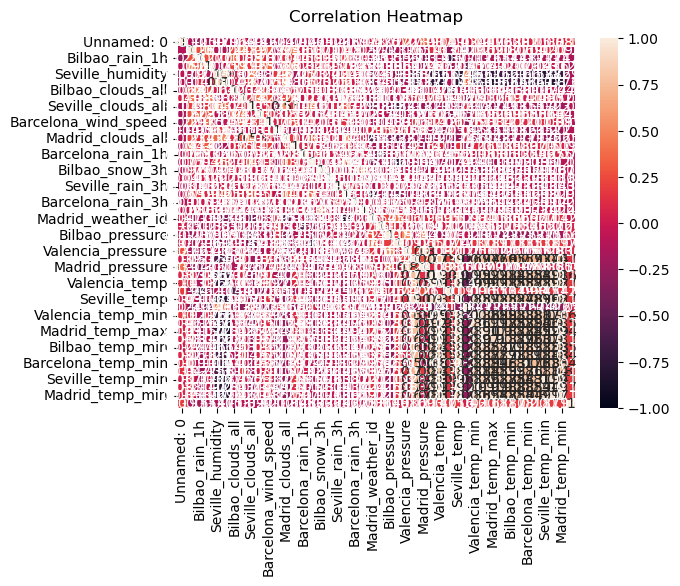

In [98]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [99]:
bilbao_data = df.filter(like='Bilbao', axis=1)
print(bilbao_data)


      Bilbao_rain_1h  Bilbao_clouds_all  Bilbao_wind_speed  Bilbao_wind_deg  \
0                0.0           0.000000           1.000000       223.333333   
1                0.0           0.000000           1.000000       221.000000   
2                0.0           0.000000           1.000000       214.333333   
3                0.0           0.000000           1.000000       199.666667   
4                0.0           2.000000           0.333333       185.000000   
...              ...                ...                ...              ...   
8758             0.0          56.666667           4.333333       226.666667   
8759             0.0          26.666667           8.000000       220.000000   
8760             0.4          63.333333           8.333333       283.333333   
8761             0.2          63.333333           2.666667       220.000000   
8762             0.0          20.000000           1.666667       156.666667   

      Bilbao_snow_3h  Bilbao_pressure  Bilbao_weath

In [100]:
bilbao_summary = bilbao_data.describe()
print(bilbao_summary)


       Bilbao_rain_1h  Bilbao_clouds_all  Bilbao_wind_speed  Bilbao_wind_deg  \
count     8763.000000        8763.000000        8763.000000      8763.000000   
mean         0.135753          43.469132           1.850356       158.957511   
std          0.374901          32.551044           1.695888       102.056299   
min          0.000000           0.000000           0.000000         0.000000   
25%          0.000000          10.000000           0.666667        73.333333   
50%          0.000000          45.000000           1.000000       147.000000   
75%          0.100000          75.000000           2.666667       234.000000   
max          3.000000         100.000000          12.666667       359.333333   

       Bilbao_snow_3h  Bilbao_pressure  Bilbao_weather_id  Bilbao_temp_min  \
count     8763.000000      8763.000000        8763.000000      8763.000000   
mean         0.031912      1017.739549         724.722362       285.017973   
std          0.557264        10.046124       

In [101]:
bilbao_null_data = bilbao_data.isnull().sum()
print(bilbao_null_data)


Bilbao_rain_1h       0
Bilbao_clouds_all    0
Bilbao_wind_speed    0
Bilbao_wind_deg      0
Bilbao_snow_3h       0
Bilbao_pressure      0
Bilbao_weather_id    0
Bilbao_temp_min      0
Bilbao_temp          0
Bilbao_temp_max      0
dtype: int64


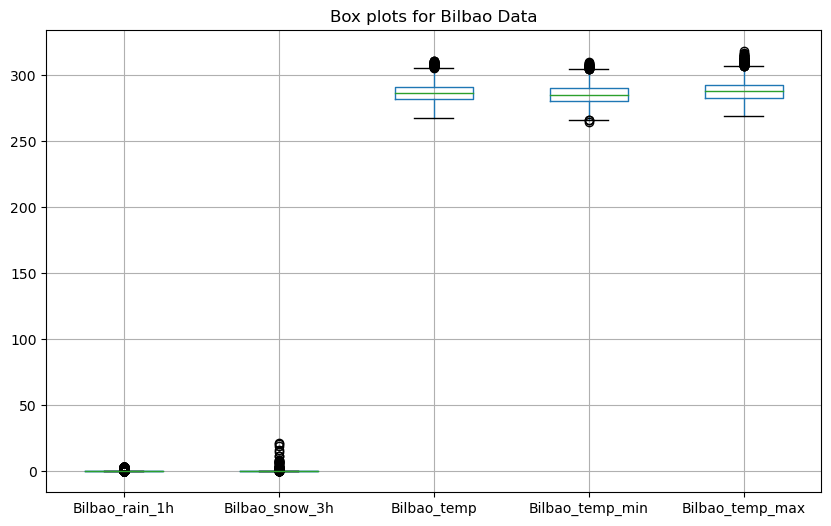

In [102]:
# Select the columns to analyze
columns_to_analyze = ['Bilbao_rain_1h', 'Bilbao_snow_3h', 'Bilbao_temp', 'Bilbao_temp_min', 'Bilbao_temp_max']

# Create box plots for selected columns
plt.figure(figsize=(10,6))
bilbao_data[columns_to_analyze].boxplot()
plt.title('Box plots for Bilbao Data')
plt.show()


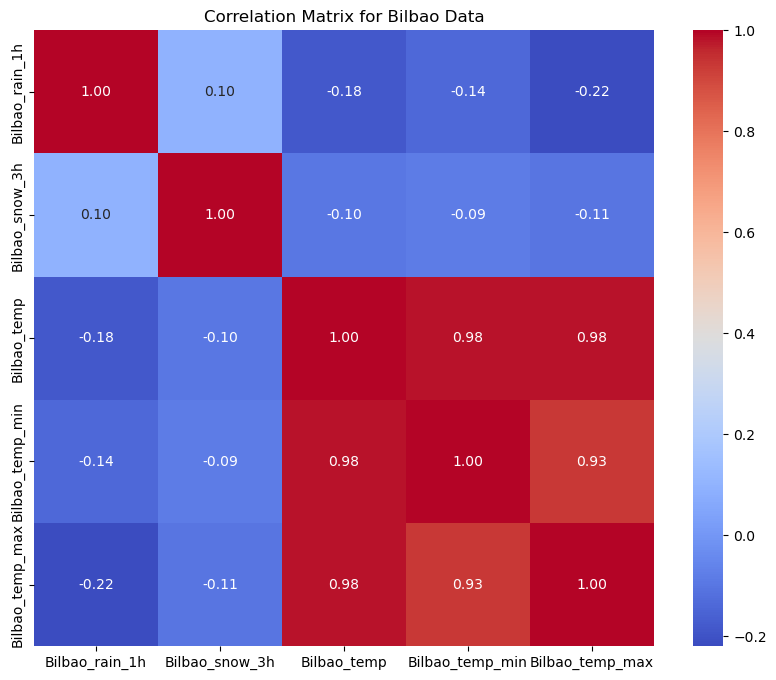

In [103]:
columns_to_correlate = ['Bilbao_rain_1h', 'Bilbao_snow_3h', 'Bilbao_temp', 'Bilbao_temp_min', 'Bilbao_temp_max']

# Compute the correlation matrix
correlation_matrix = bilbao_data[columns_to_correlate].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix for Bilbao Data')
plt.show()


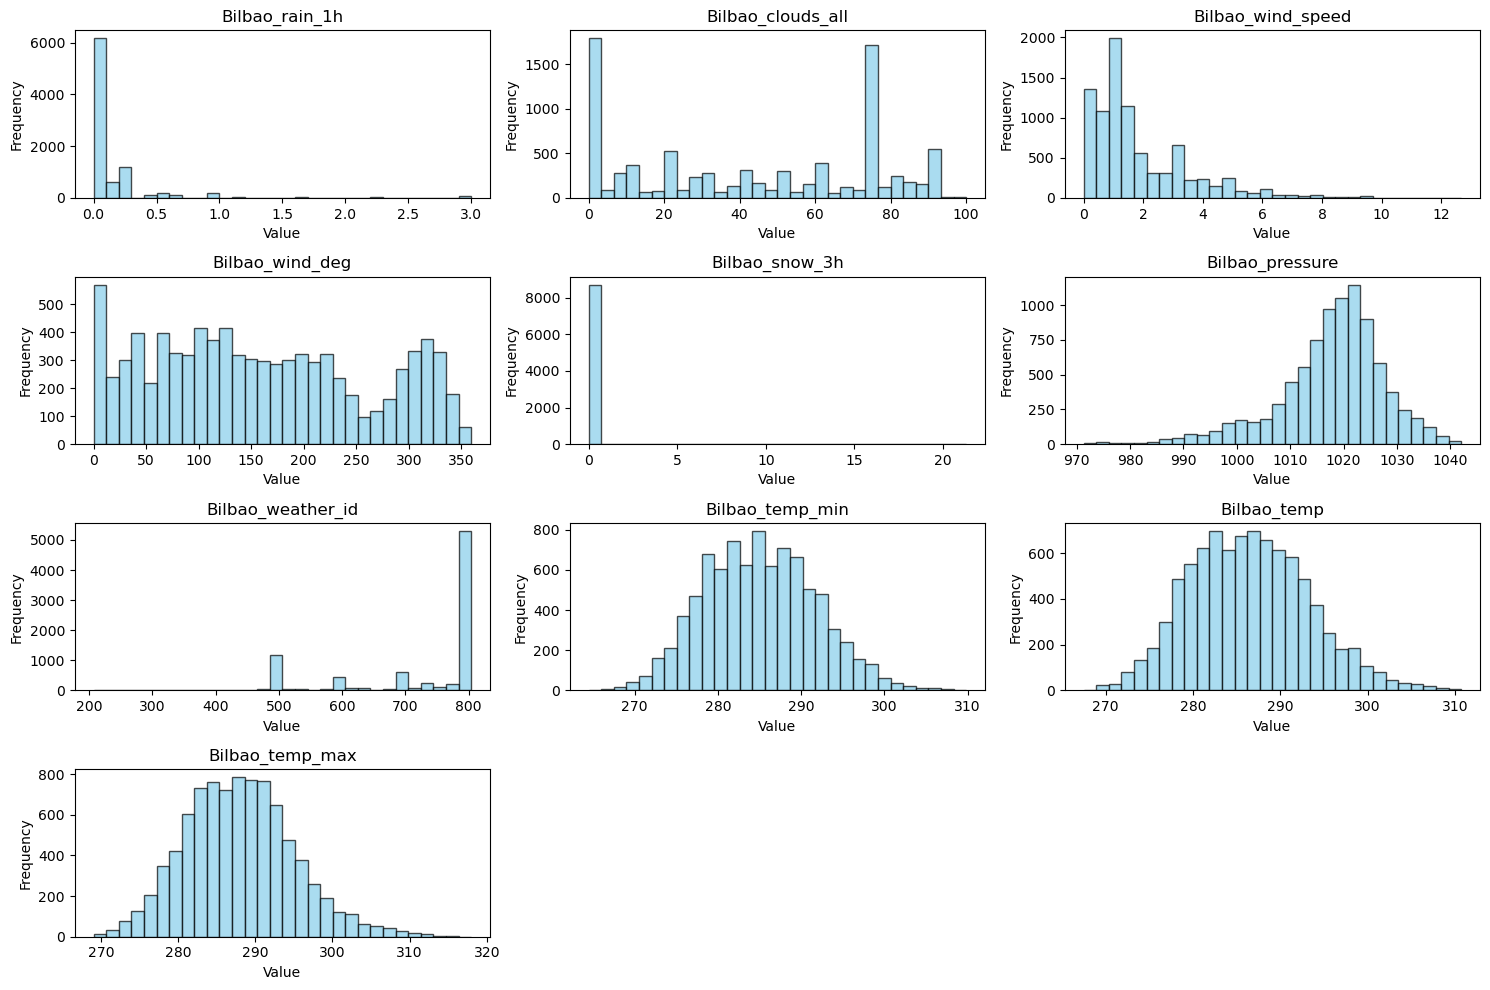

In [104]:
bilbao_columns = [col for col in df.columns if 'Bilbao' in col]

# Filter the dataframe to keep only the Bilbao columns
df_bilbao = df[bilbao_columns]

# Set up the figure size and layout
plt.figure(figsize=(15, 10))
num_cols = 3
num_rows = len(bilbao_columns) // num_cols + 1

# Plotting histograms for each Bilbao column
for i, col in enumerate(bilbao_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.hist(df_bilbao[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()





In [105]:
df.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

In [106]:
df2.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

In [107]:
df_clean = df

In [108]:
df_clean.drop(columns=['Unnamed: 0'], inplace=True)

In [109]:
df2.drop(columns=['Unnamed: 0'], inplace=True)

In [110]:
print('Mode:') 
print(df['Valencia_pressure'].mode())

Mode:
0    1018.0
Name: Valencia_pressure, dtype: float64


In [111]:
df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mode()[0])

In [112]:
df2['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mode()[0])

In [113]:
df_clean.Valencia_pressure.isnull().sum()

0

In [114]:
df2.Valencia_pressure.isnull().sum()

0

In [115]:
df_clean.head()

time  Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  \
0  2015-01-01 03:00:00           0.666667           level_5             0.0   
1  2015-01-01 06:00:00           0.333333          level_10             0.0   
2  2015-01-01 09:00:00           1.000000           level_9             0.0   
3  2015-01-01 12:00:00           1.000000           level_8             0.0   
4  2015-01-01 15:00:00           1.000000           level_7             0.0   

   Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
0             0.666667         74.333333        64.000000                0.0   
1             1.666667         78.333333        64.666667                0.0   
2             1.000000         71.333333        64.333333                0.0   
3             1.000000         65.333333        56.333333                0.0   
4             1.000000         59.000000        57.000000                2.0   

   Bilbao_wind_speed  Seville_clouds_all  ...  Madrid_temp_max  \
0           1.000000                 0.0  ...       265.938000   
1           1.000000                 0.0  ...       266.386667   
2           1.000000                 0.0  ...       272.708667   
3           1.000000                 0.0  ...       281.895219   
4           0.333333                 0.0  ...       280.678437   

   Barcelona_temp  Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  \
0      281.013000       269.338615   269.338615          281.013000   
1      280.561667       270.376000   270.376000          280.561667   
2      281.583667       275.027229   275.027229          281.583667   
3      283.434104       281.135063   281.135063          283.434104   
4      284.213167       282.252063   282.252063          284.213167   

   Bilbao_temp_max Seville_temp_min  Madrid_temp  Madrid_temp_min  \
0       269.338615       274.254667   265.938000       265.938000   
1       270.376000       274.945000   266.386667       266.386667   
2       275.027229       278.792000   272.708667       272.708667   
3       281.135063       285.394000   281.895219       281.895219   
4       282.252063       285.513719   280.678437       280.678437   

   load_shortfall_3h  
0        6715.666667  
1        4171.666667  
2        4274.666667  
3        5075.666667  
4        6620.666667  

[5 rows x 48 columns]

In [116]:
df_clean['time'] = pd.to_datetime(df_clean['time'])
df2['time'] = pd.to_datetime(df2['time'])

In [117]:
df_clean['hourofday'] = df_clean['time'].dt.hour
df2['hourofday'] = df2['time'].dt.hour

In [118]:
df_clean['hourofday']

0        3
1        6
2        9
3       12
4       15
        ..
8758     9
8759    12
8760    15
8761    18
8762    21
Name: hourofday, Length: 8763, dtype: int64

In [119]:
df2['hourofday']

0        0
1        3
2        6
3        9
4       12
        ..
2915     9
2916    12
2917    15
2918    18
2919    21
Name: hourofday, Length: 2920, dtype: int64

In [120]:
df_clean['date'] = df_clean['time'].dt.date
df_clean['time'] = df_clean['time'].dt.time

In [121]:
df2['date'] = df2['time'].dt.date
df2['time'] = df2['time'].dt.time

In [122]:
df_clean = pd.DataFrame(df)

In [123]:
df2 = pd.DataFrame(df)

In [124]:
#Convert to datetime
df_clean['date'] = pd.to_datetime(df_clean['date'])


In [125]:
df2['date'] = pd.to_datetime(df2['date'])


In [126]:
#Create Year, Month and Date features
df_clean['year'] = df_clean['date'].dt.year
df_clean['month'] = df_clean['date'].dt.month
df_clean['day'] = df_clean['date'].dt.day

In [127]:
df2['year'] = df2['date'].dt.year
df2['month'] = df2['date'].dt.month
df2['day'] = df2['date'].dt.day

In [128]:
def get_season(month):
    if month in [3, 4, 5]:  # Spring: March (3) to May (5)
        return 2 # 2 = spring, coverted to an int for workability
    elif month in [6, 7, 8]:  # Summer: June (6) to August (8)
        return 3 # 3 = summer, coverted to an int for workability
    elif month in [9, 10, 11]:  # Autumn: September (9) to November (11)
        return 4 # 4 = autumn, coverted to an int for workability
    else:  # Winter: December (12), January (1), February (2)
        return 1 # 1 = winter, coverted to an int for workability

In [129]:
df_clean['season'] = df_clean['month'].apply(get_season)

In [130]:
df2['season'] = df2['month'].apply(get_season)

In [131]:
df_clean = pd.DataFrame(df)

In [132]:
df2 = pd.DataFrame(df)

In [133]:
df_clean.drop(columns=['time'], inplace=True)
df2.drop(columns=['time'], inplace=True)
df_clean.drop(columns=['date'], inplace=True)
df2.drop(columns=['date'], inplace=True)


In [134]:
df_clean.head(10)

Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0           0.666667           level_5             0.0             0.666667   
1           0.333333          level_10             0.0             1.666667   
2           1.000000           level_9             0.0             1.000000   
3           1.000000           level_8             0.0             1.000000   
4           1.000000           level_7             0.0             1.000000   
5           1.000000           level_7             0.0             1.000000   
6           1.000000           level_8             0.0             1.000000   
7           1.000000           level_9             0.0             1.000000   
8           1.000000           level_9             0.0             1.000000   
9           1.000000           level_9             0.0             1.333333   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0         74.333333        64.000000           0.000000           1.000000   
1         78.333333        64.666667           0.000000           1.000000   
2         71.333333        64.333333           0.000000           1.000000   
3         65.333333        56.333333           0.000000           1.000000   
4         59.000000        57.000000           2.000000           0.333333   
5         69.666667        67.333333          12.333333           0.666667   
6         83.666667        63.333333          16.333333           1.000000   
7         83.666667        64.000000           8.666667           1.333333   
8         86.000000        63.333333           5.333333           1.000000   
9         87.000000        63.666667          15.333333           1.000000   

   Seville_clouds_all  Bilbao_wind_deg  ...  Bilbao_temp_max  \
0                 0.0       223.333333  ...       269.338615   
1                 0.0       221.000000  ...       270.376000   
2                 0.0       214.333333  ...       275.027229   
3                 0.0       199.666667  ...       281.135063   
4                 0.0       185.000000  ...       282.252063   
5                 0.0       191.333333  ...       277.919000   
6                 0.0       210.333333  ...       274.295437   
7                 0.0       238.666667  ...       272.903167   
8                 0.0       258.333333  ...       271.780115   
9                 0.0       255.333333  ...       271.673667   

   Seville_temp_min  Madrid_temp  Madrid_temp_min  load_shortfall_3h  \
0        274.254667   265.938000       265.938000        6715.666667   
1        274.945000   266.386667       266.386667        4171.666667   
2        278.792000   272.708667       272.708667        4274.666667   
3        285.394000   281.895219       281.895219        5075.666667   
4        285.513719   280.678437       280.678437        6620.666667   
5        282.077844   274.639229       274.639229        6842.000000   
6        277.637000   268.287000       268.287000       10760.333333   
7        276.457333   266.882333       266.882333       10866.000000   
8        276.151667   266.226667       266.226667       -1850.333333   
9        276.453000   266.878000       266.878000       -4002.333333   

  hourofday  year  month  day  season  
0         3  2015      1    1       1  
1         6  2015      1    1       1  
2         9  2015      1    1       1  
3        12  2015      1    1       1  
4        15  2015      1    1       1  
5        18  2015      1    1       1  
6        21  2015      1    1       1  
7         0  2015      1    2       1  
8         3  2015      1    2       1  
9         6  2015      1    2       1  

[10 rows x 52 columns]

In [135]:
df2.head(2)

Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0           0.666667           level_5             0.0             0.666667   
1           0.333333          level_10             0.0             1.666667   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0         74.333333        64.000000                0.0                1.0   
1         78.333333        64.666667                0.0                1.0   

   Seville_clouds_all  Bilbao_wind_deg  ...  Bilbao_temp_max  \
0                 0.0       223.333333  ...       269.338615   
1                 0.0       221.000000  ...       270.376000   

   Seville_temp_min  Madrid_temp  Madrid_temp_min  load_shortfall_3h  \
0        274.254667   265.938000       265.938000        6715.666667   
1        274.945000   266.386667       266.386667        4171.666667   

  hourofday  year  month  day  season  
0         3  2015      1    1       1  
1         6  2015      1    1       1  

[2 rows x 52 columns]

In [136]:
#To refine the 'Valencia_wind_deg' column further, we will extract only the numerical values
df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\d+)')

In [137]:
df2['Valencia_wind_deg'] = df2['Valencia_wind_deg'].str.extract('(\d+)')

In [138]:
#Transform to numeric
df_clean['Valencia_wind_deg'] = pd.to_numeric(df_clean['Valencia_wind_deg'])

In [139]:
df2['Valencia_wind_deg'] = pd.to_numeric(df2['Valencia_wind_deg'])

In [140]:
df_clean.Valencia_wind_deg

0        5
1       10
2        9
3        8
4        7
        ..
8758     6
8759     6
8760     9
8761     8
8762     9
Name: Valencia_wind_deg, Length: 8763, dtype: int64

In [141]:
df2.Valencia_wind_deg

0        5
1       10
2        9
3        8
4        7
        ..
8758     6
8759     6
8760     9
8761     8
8762     9
Name: Valencia_wind_deg, Length: 8763, dtype: int64

In [142]:
df_time_y = df_clean[['hourofday', 'year', 'month', 'day', 'season', 'load_shortfall_3h']]

In [143]:
df_time_y.head(5)

hourofday  year  month  day  season  load_shortfall_3h
0          3  2015      1    1       1        6715.666667
1          6  2015      1    1       1        4171.666667
2          9  2015      1    1       1        4274.666667
3         12  2015      1    1       1        5075.666667
4         15  2015      1    1       1        6620.666667

<module 'matplotlib.pyplot' from 'C:\\Users\\HP\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

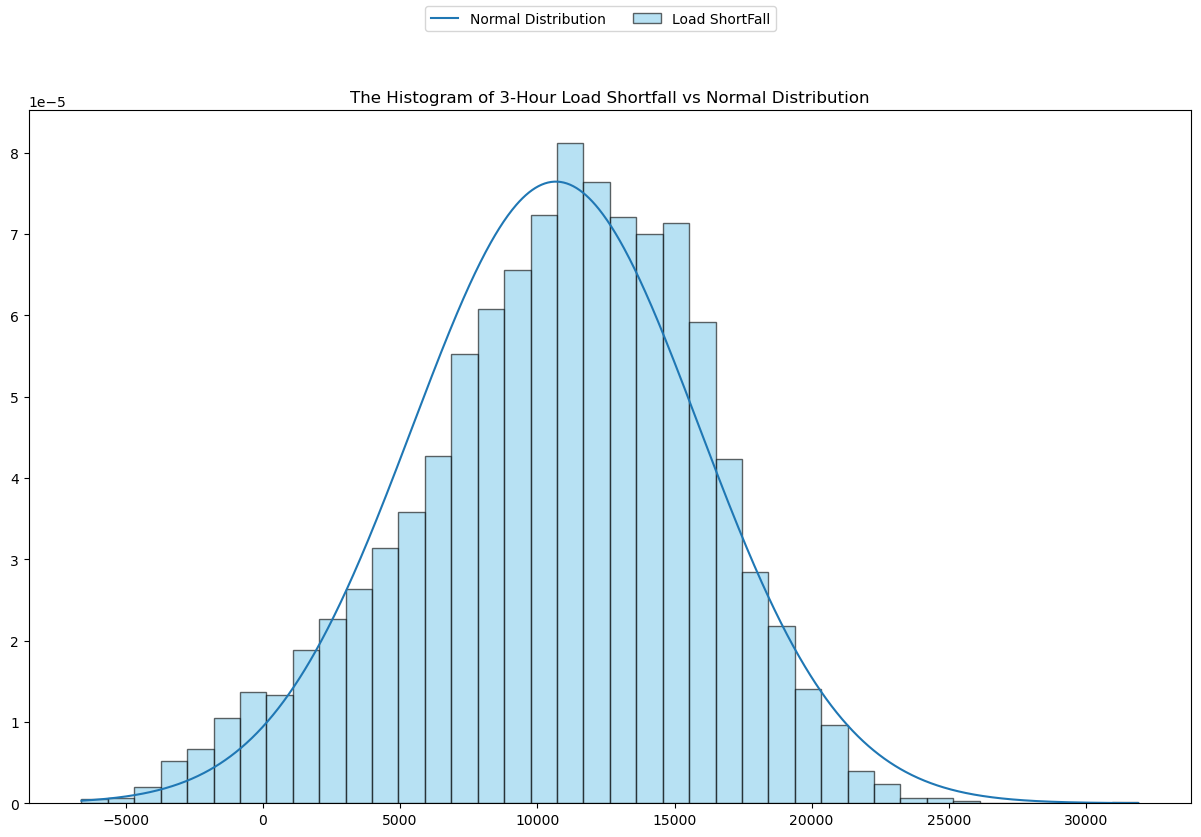

In [144]:
# Create a new figure object
fig, ax = plt.subplots(figsize=(15,9))
# Calculate important metrics from dataframe
mean_val =  df_time_y['load_shortfall_3h'].mean()
std_dev = df_time_y['load_shortfall_3h'].std()
min_val, max_val = df_clean['load_shortfall_3h'].min(), df_clean['load_shortfall_3h'].max()

# Plot the theoretical normal distribution of target variable
x = np.linspace(min_val, max_val, 1000)
ax.plot(x, norm.pdf(x, mean_val, std_dev), label = "Normal Distribution")

# Plot the normalized histogram of target variable
ax.hist(df_clean['load_shortfall_3h'].values,
        alpha=0.6,
        label='Load ShortFall',
        bins=40,
        density=True,
        color='skyblue', 
        edgecolor='black'
       )

# Set title of figure
ax.set_title("The Histogram of 3-Hour Load Shortfall vs Normal Distribution")

# Create lines and labels for use in legend
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# Insert figure legend and show the final figure
fig.legend(lines, labels, loc='upper center', ncol=2)
plt

In [145]:
df_time_y.describe()

hourofday         year        month          day       season  \
count  8763.000000  8763.000000  8763.000000  8763.000000  8763.000000   
mean     10.498459  2016.000571     6.524820    15.740157     2.503595   
std       6.874031     0.816054     3.447976     8.798664     1.114565   
min       0.000000  2015.000000     1.000000     1.000000     1.000000   
25%       4.500000  2015.000000     4.000000     8.000000     2.000000   
50%       9.000000  2016.000000     7.000000    16.000000     3.000000   
75%      15.000000  2017.000000    10.000000    23.000000     3.000000   
max      21.000000  2017.000000    12.000000    31.000000     4.000000   

       load_shortfall_3h  
count        8763.000000  
mean        10673.857612  
std          5218.046404  
min         -6618.000000  
25%          7390.333333  
50%         11114.666667  
75%         14498.166667  
max         31904.000000

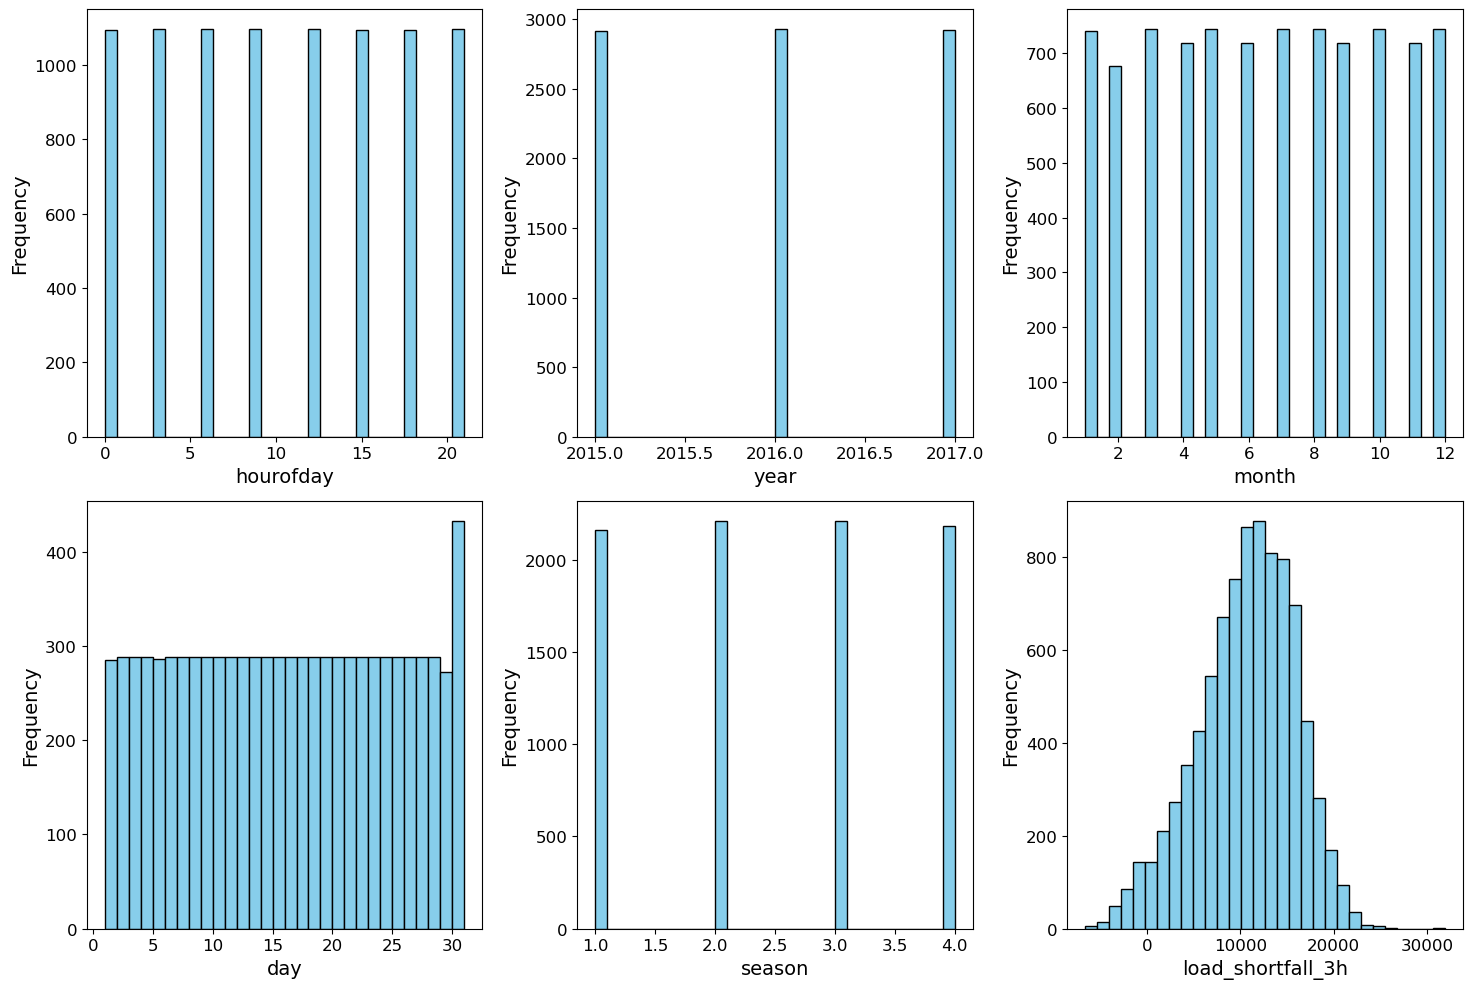

In [146]:
# Define the number of rows and columns for subplots
number_of_rows = 2  # Number of rows in the subplot grid
number_of_columns = 3  # Number of columns in the subplot grid

# Plots histograms for all features with larger labels
fig, axes = plt.subplots(figsize=(15, 10), nrows=number_of_rows, ncols=number_of_columns)

# Iterate through the columns of the DataFrame and plot histograms
for i, column in enumerate(df_time_y.columns):
    row_index = i // number_of_columns
    col_index = i % number_of_columns
    ax = axes[row_index, col_index]
    
    ax.hist(df_time_y[column], bins=30, color='skyblue', edgecolor='black')
    ax.set_xlabel(column, fontsize=14)  # Set x-axis label with fontsize 14
    ax.set_ylabel('Frequency', fontsize=14)  # Set y-axis label with fontsize 14
    ax.tick_params(axis='both', which='both', labelsize=12)  # Set tick label fontsize

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


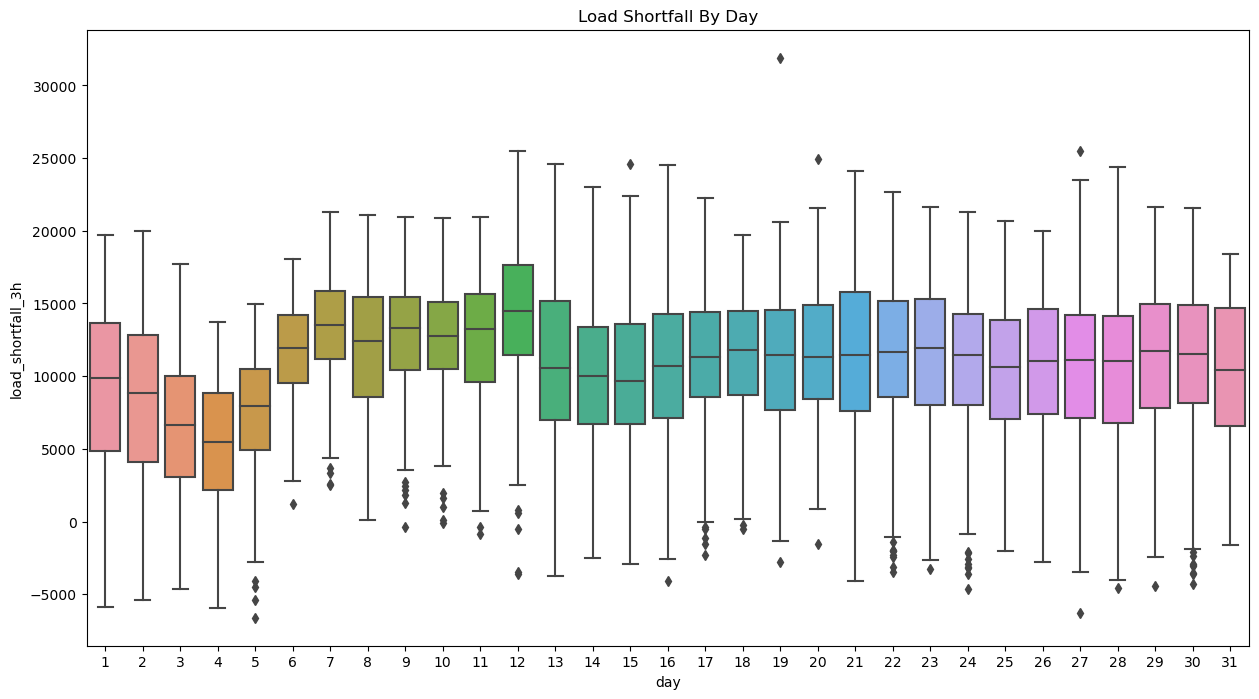

In [147]:
# Initialize a new figure object
fig, ax = plt.subplots(figsize=(15,8))

# Plot target variable as a function of weekday
sns.boxplot(data=df_time_y,
            x="day",
            y="load_shortfall_3h"
           )

# Set title, set x axis to corresponding day of the week and display image
ax.set_title('Load Shortfall By Day')
plt.show()

In [148]:
df_clean.corr()

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  \
Madrid_wind_speed              1.000000           0.121835        0.259719   
Valencia_wind_deg              0.121835           1.000000        0.199288   
Bilbao_rain_1h                 0.259719           0.199288        1.000000   
Valencia_wind_speed            0.513092           0.292731        0.265864   
Seville_humidity              -0.117892           0.240007        0.069878   
Madrid_humidity               -0.137092           0.253549        0.106765   
Bilbao_clouds_all              0.244001           0.158266        0.370733   
Bilbao_wind_speed              0.377854           0.075864        0.085398   
Seville_clouds_all             0.191251           0.085519        0.081131   
Bilbao_wind_deg                0.270950           0.157252        0.279350   
Barcelona_wind_speed           0.294640           0.042795        0.069997   
Barcelona_wind_deg            -0.095380           0.151146       -0.030723   
Madrid_clouds_all              0.230126           0.105080        0.135524   
Seville_wind_speed             0.434104          -0.007258        0.140101   
Barcelona_rain_1h              0.062758           0.000699        0.052558   
Seville_rain_1h                0.108413          -0.019783        0.092984   
Bilbao_snow_3h                 0.071183           0.069929        0.096730   
Barcelona_pressure             0.011134           0.026729        0.052458   
Seville_rain_3h                0.004795          -0.019602        0.016392   
Madrid_rain_1h                 0.150446          -0.017304        0.187423   
Barcelona_rain_3h             -0.014644           0.016777       -0.001412   
Valencia_snow_3h               0.021660           0.020481        0.008269   
Madrid_weather_id             -0.169358          -0.003746       -0.147768   
Barcelona_weather_id          -0.099582          -0.018537       -0.120618   
Bilbao_pressure               -0.231747          -0.099051       -0.054814   
Seville_weather_id            -0.120014           0.000478       -0.095723   
Valencia_pressure             -0.198631          -0.155041       -0.224834   
Seville_temp_max               0.050043          -0.328244       -0.210323   
Madrid_pressure               -0.136672          -0.189989       -0.298587   
Valencia_temp_max              0.133468          -0.245685       -0.135198   
Valencia_temp                  0.128726          -0.252334       -0.127953   
Bilbao_weather_id             -0.238128          -0.209860       -0.604616   
Seville_temp                   0.090861          -0.342016       -0.170009   
Valencia_humidity             -0.285787          -0.192267       -0.103868   
Valencia_temp_min              0.119657          -0.255626       -0.116835   
Barcelona_temp_max             0.061854          -0.260643       -0.157326   
Madrid_temp_max                0.091464          -0.341696       -0.148397   
Barcelona_temp                 0.080133          -0.260622       -0.138901   
Bilbao_temp_min                0.077330          -0.265992       -0.141269   
Bilbao_temp                    0.060467          -0.283031       -0.182494   
Barcelona_temp_min             0.089992          -0.240981       -0.106593   
Bilbao_temp_max                0.042114          -0.292904       -0.219871   
Seville_temp_min               0.110278          -0.311775       -0.120575   
Madrid_temp                    0.109572          -0.337965       -0.135927   
Madrid_temp_min                0.098138          -0.316603       -0.116431   
load_shortfall_3h             -0.150981          -0.188674       -0.152510   
hourofday                      0.186228          -0.138415        0.054527   
year                          -0.031553          -0.057513       -0.200747   
month                         -0.237445          -0.140195       -0.188274   
day                           -0.029954          -0.010627        0.072752   
season                        -0.149807     

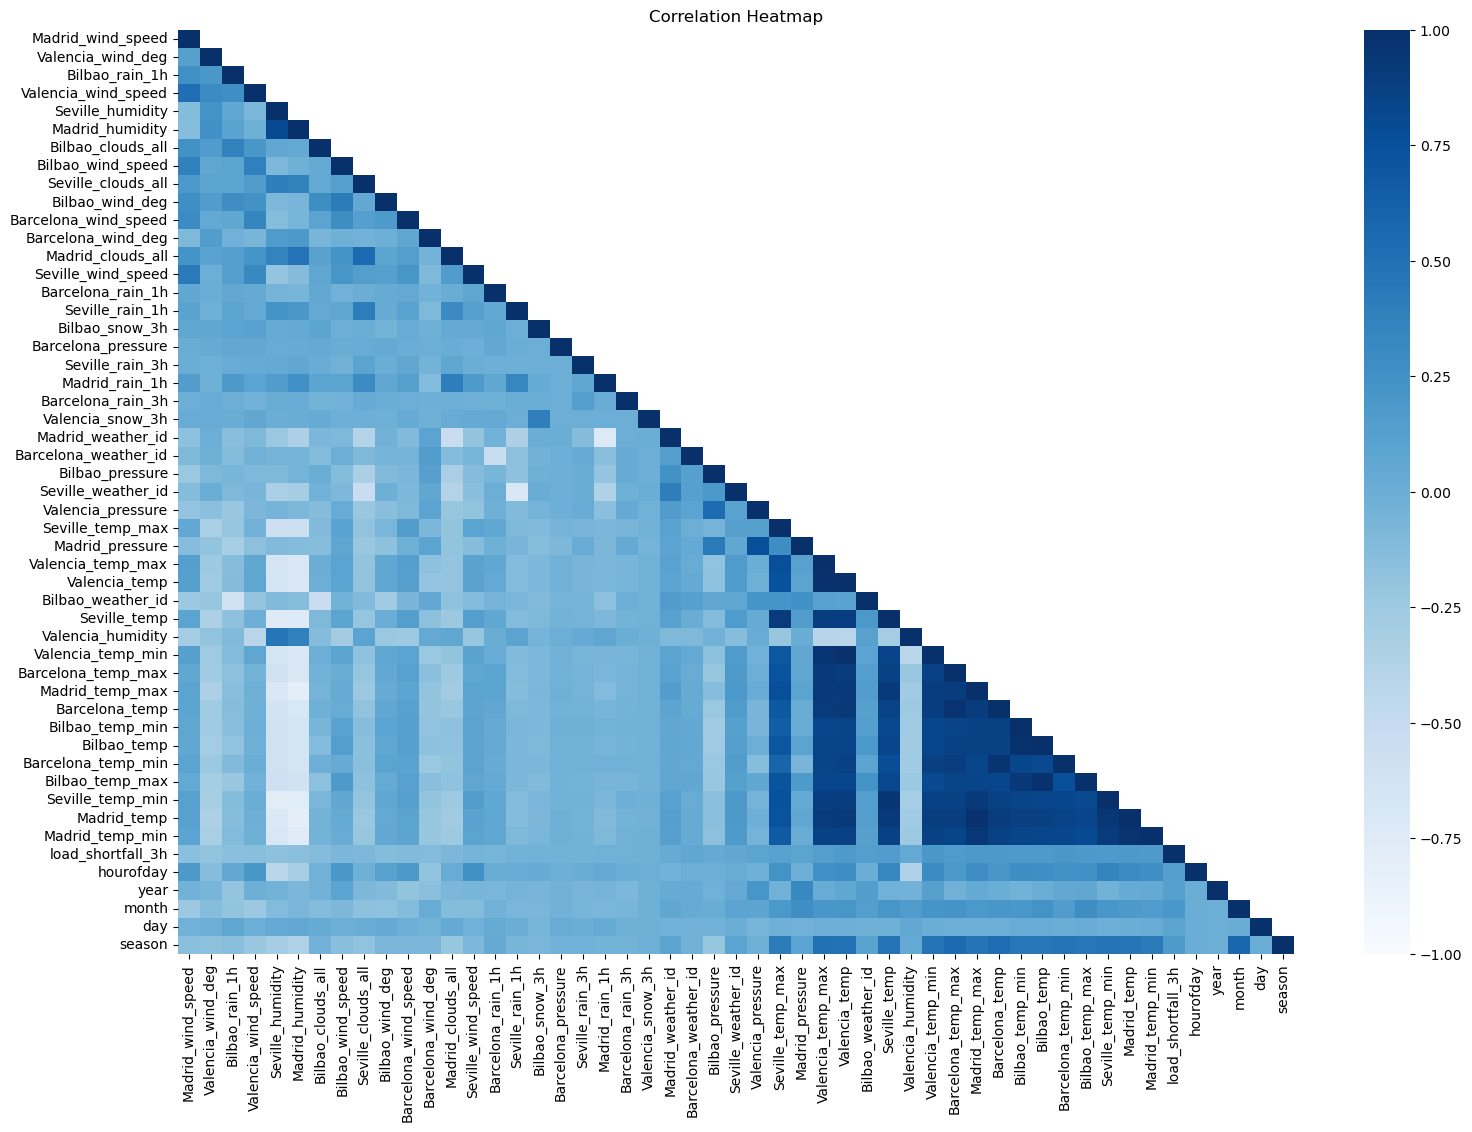

In [149]:
# Initiate a new figure object to plot our heatmap (increased figsize)
plt.figure(figsize=(18, 12))

# We look at only the lower triangle of the array, since it is symmetric around the diagonal
mask = np.tril(df_clean.corr()) == 0

# Plotting the heatmap with blue color map
sns.heatmap(df_clean.corr(),
            vmin=-1,
            vmax=1,
            mask=mask,
            cmap='Blues'  # Change the color map to blue
           )

plt.title('Correlation Heatmap');
plt.show() 


In [150]:
# Find the ten most correlated variables with the target variable
corr_top10_df = (
    df_clean.corr()['load_shortfall_3h']
    .apply(lambda x : abs(x))
    .sort_values(ascending=False)
    .head(11)
)

# Display predictor variables
corr_top10_df[1:11]

Valencia_temp_min     0.201863
month                 0.199048
Barcelona_temp_min    0.195984
Valencia_wind_deg     0.188674
Madrid_temp           0.186036
Barcelona_temp        0.182673
Madrid_temp_max       0.182548
Bilbao_temp_max       0.180934
season                0.176688
Bilbao_temp           0.176411
Name: load_shortfall_3h, dtype: float64

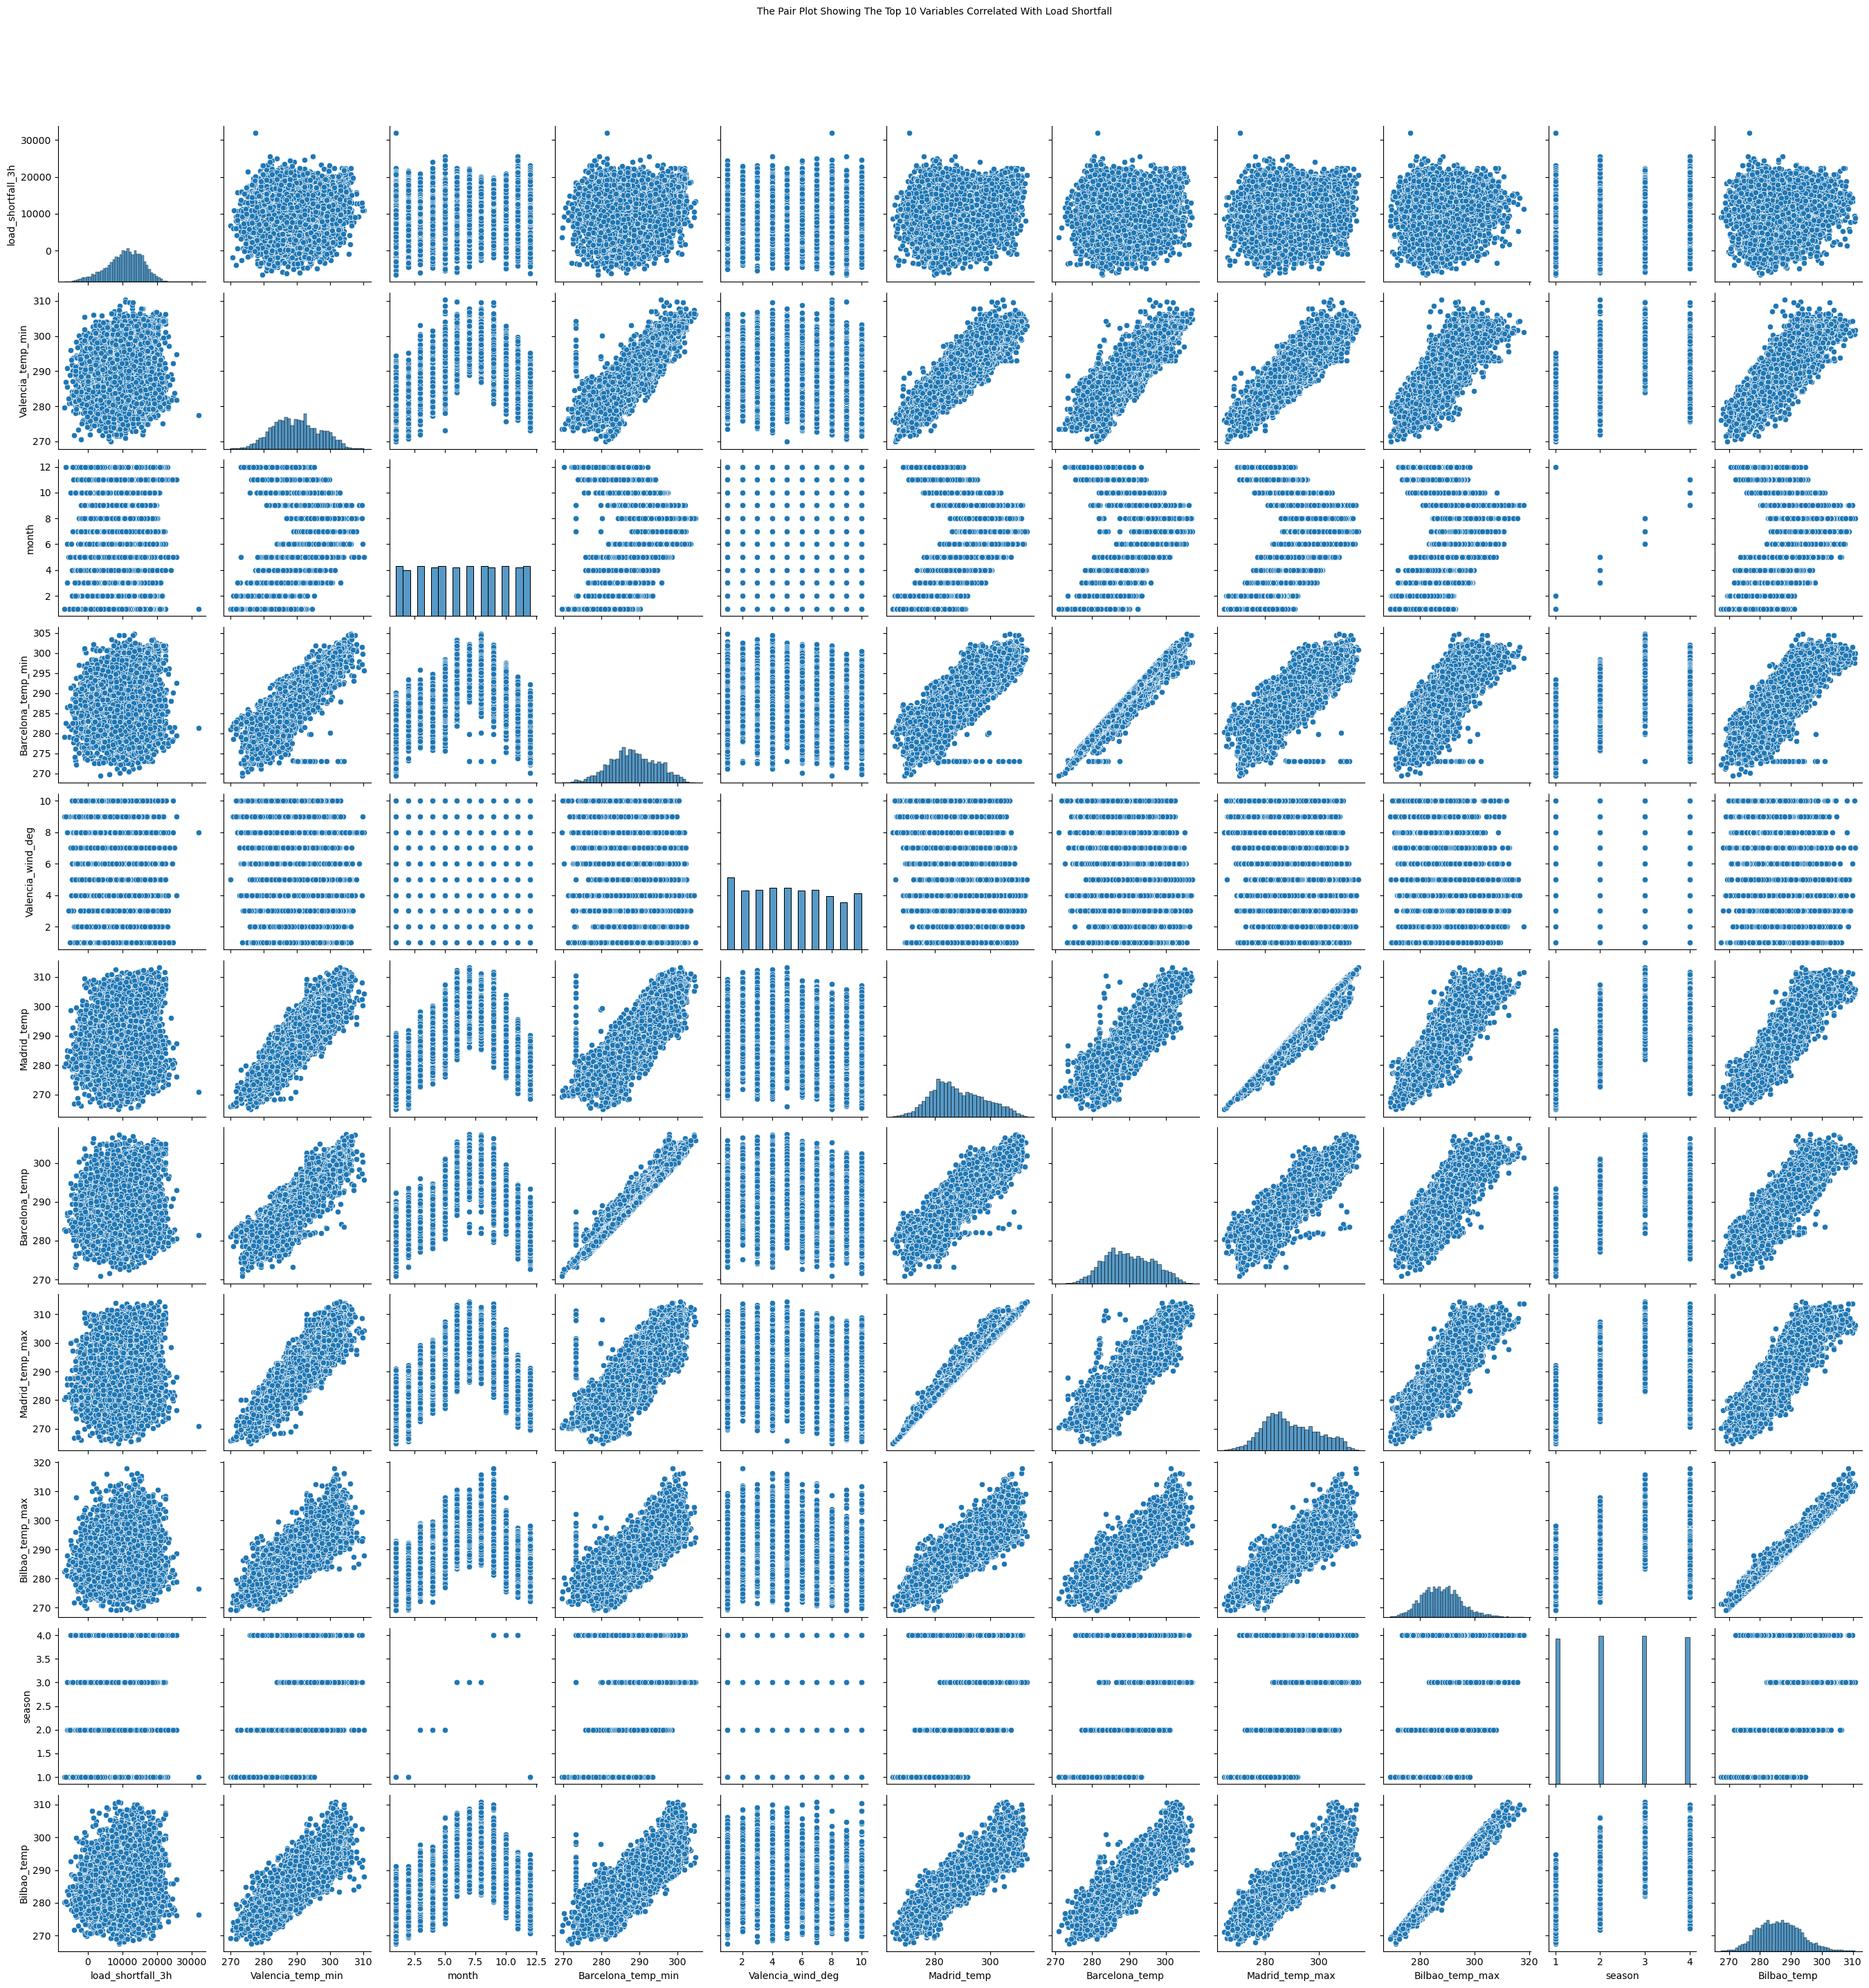

In [151]:
top10 = sns.pairplot(df_clean[corr_top10_df.index]
                    )
top10.fig.suptitle('The Pair Plot Showing The Top 10 Variables Correlated With Load Shortfall', 
                   y=1.05,
                   size=10)
plt.show()


In [152]:
# Split predictor variables from target variable
x_data = df_clean.drop(columns=['load_shortfall_3h'])  # Predictor variables (all columns except 'load_shortfall_3h')
y_data = df_clean['load_shortfall_3h']  # Target variable



In [153]:
df_clean.dtypes


Madrid_wind_speed       float64
Valencia_wind_deg         int64
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_pressure         float64
Valencia_temp_max       float64
Valencia

In [154]:
df_clean['Seville_pressure'] = pd.to_numeric(df_clean['Seville_pressure'], errors='coerce').astype('Int64')


In [155]:

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_clean)
X_standardise = pd.DataFrame(X_scaled, columns=df_clean.columns)

In [156]:
# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.04)

# Use the object to apply the threshold on data
selector.fit(X_standardise)

VarianceThreshold(threshold=0.04)

In [157]:
# Get column variances
column_variances = selector.variances_

# Create dictionary of column variances
vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_standardise.columns, column_variances)]

# Transform dictionary into a dataframe for better visualization
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

Variable_Name  Variance
48                  year  0.166467
51                season  0.138013
47             hourofday  0.107136
6      Bilbao_clouds_all  0.105945
1      Valencia_wind_deg  0.102221
49                 month  0.098241
50                   day  0.086009
9        Bilbao_wind_deg  0.080656
12     Madrid_clouds_all  0.078692
5        Madrid_humidity  0.067493
8     Seville_clouds_all  0.062181
11    Barcelona_wind_deg  0.061218
4       Seville_humidity  0.060892
34     Valencia_humidity  0.046143
45       Madrid_temp_min  0.041115
29       Madrid_pressure  0.040475
37       Madrid_temp_max  0.038809
32     Bilbao_weather_id  0.037692
44           Madrid_temp  0.037678
33          Seville_temp  0.034066
28      Seville_temp_max  0.033598
43      Seville_temp_min  0.033520
38        Barcelona_temp  0.031985
27     Valencia_pressure  0.031408
31         Valencia_temp  0.031211
36    Barcelona_temp_max  0.030093
41    Barcelona_temp_min  0.029827
35     Valencia_temp_min  0.029252
30     Valencia_temp_max  0.029065
40           Bilbao_temp  0.024880
39       Bilbao_temp_min  0.021878
24  Barcelona_weather_id  0.021340
42       Bilbao_temp_max  0.021109
13    Seville_wind_speed  0.020559
0      Madrid_wind_speed  0.020257
25       Bilbao_pressure  0.020208
10  Barcelona_wind_speed  0.020017
46     load_shortfall_3h  0.018346
7      Bilbao_wind_speed  0.017923
23     Madrid_weather_id  0.016996
2         Bilbao_rain_1h  0.015615
26    Seville_weather_id  0.014185
16       Seville_rain_1h  0.003436
14     Barcelona_rain_1h  0.002797
20        Madrid_rain_1h  0.002588
3    Valencia_wind_speed  0.002150
21     Barcelona_rain_3h  0.001844
19       Seville_rain_3h  0.001537
17        Bilbao_snow_3h  0.000684
22      Valencia_snow_3h  0.000225
18    Barcelona_pressure  0.000198
15      Seville_pressure       NaN

In [158]:
# Find columns to remove:
df_vars_remove = df_vars[df_vars['Variance']<0.04]


# Make a list of column names to remove
columns_to_remove = list(df_vars_remove["Variable_Name"])

# Display variables to be removed, along with their variances
df_vars_remove.sort_values(by="Variance", ascending=False)

Variable_Name  Variance
37       Madrid_temp_max  0.038809
32     Bilbao_weather_id  0.037692
44           Madrid_temp  0.037678
33          Seville_temp  0.034066
28      Seville_temp_max  0.033598
43      Seville_temp_min  0.033520
38        Barcelona_temp  0.031985
27     Valencia_pressure  0.031408
31         Valencia_temp  0.031211
36    Barcelona_temp_max  0.030093
41    Barcelona_temp_min  0.029827
35     Valencia_temp_min  0.029252
30     Valencia_temp_max  0.029065
40           Bilbao_temp  0.024880
39       Bilbao_temp_min  0.021878
24  Barcelona_weather_id  0.021340
42       Bilbao_temp_max  0.021109
13    Seville_wind_speed  0.020559
0      Madrid_wind_speed  0.020257
25       Bilbao_pressure  0.020208
10  Barcelona_wind_speed  0.020017
46     load_shortfall_3h  0.018346
7      Bilbao_wind_speed  0.017923
23     Madrid_weather_id  0.016996
2         Bilbao_rain_1h  0.015615
26    Seville_weather_id  0.014185
16       Seville_rain_1h  0.003436
14     Barcelona_rain_1h  0.002797
20        Madrid_rain_1h  0.002588
3    Valencia_wind_speed  0.002150
21     Barcelona_rain_3h  0.001844
19       Seville_rain_3h  0.001537
17        Bilbao_snow_3h  0.000684
22      Valencia_snow_3h  0.000225
18    Barcelona_pressure  0.000198

In [159]:
# Select new columns
x_new = X_standardise[X_standardise.columns[selector.get_support(indices=True)]]

# Save variable names for later
x_var_names = x_new.columns

# Comparing predictor variable count before and after applying variance threshold:
print("Before threshold: ", len(df_vars.T.columns), " predictors")
print("After threshold: ", len(x_new.columns), " predictors")

Before threshold:  52  predictors
After threshold:  16  predictors


In [160]:
# Standardising the data (using MinMaxScaler in sklearn.preprocessing package):
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x_new)
X_standardise = pd.DataFrame(X_scaled, columns=x_new.columns)

In [161]:
X_standardise.head(5)

Valencia_wind_deg  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
0           0.444444          0.720000         0.615658               0.00   
1           1.000000          0.763636         0.622776               0.00   
2           0.888889          0.687273         0.619217               0.00   
3           0.777778          0.621818         0.533808               0.00   
4           0.666667          0.552727         0.540925               0.02   

   Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_deg  Madrid_clouds_all  \
0                 0.0         0.621521            0.118519                0.0   
1                 0.0         0.615028            0.386111                0.0   
2                 0.0         0.596475            0.905556                0.0   
3                 0.0         0.555659            0.758333                0.0   
4                 0.0         0.514842            0.722222                0.0   

   Madrid_pressure  Valencia_humidity  Madrid_temp_min  hourofday  year  \
0         0.395770           0.728625         0.021028   0.142857   0.0   
1         0.407855           0.676580         0.030910   0.285714   0.0   
2         0.419940           0.617100         0.170162   0.428571   0.0   
3         0.607251           0.486989         0.372508   0.571429   0.0   
4         0.975831           0.535316         0.345707   0.714286   0.0   

   month  day  season  
0    0.0  0.0     0.0  
1    0.0  0.0     0.0  
2    0.0  0.0     0.0  
3    0.0  0.0     0.0  
4    0.0  0.0     0.0

In [162]:
columns_to_keep=['Valencia_wind_deg','Seville_humidity','Madrid_humidity','Bilbao_clouds_all','Seville_clouds_all','Bilbao_wind_deg','Barcelona_wind_deg','Madrid_clouds_all','Madrid_pressure','Valencia_humidity','Madrid_temp_min','hourofday','year','month','day','season']

In [163]:
df2 = df2[columns_to_keep]

In [164]:
df2.head(5)

Valencia_wind_deg  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
0                  5         74.333333        64.000000                0.0   
1                 10         78.333333        64.666667                0.0   
2                  9         71.333333        64.333333                0.0   
3                  8         65.333333        56.333333                0.0   
4                  7         59.000000        57.000000                2.0   

   Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_deg  Madrid_clouds_all  \
0                 0.0       223.333333           42.666667                0.0   
1                 0.0       221.000000          139.000000                0.0   
2                 0.0       214.333333          326.000000                0.0   
3                 0.0       199.666667          273.000000                0.0   
4                 0.0       185.000000          260.000000                0.0   

   Madrid_pressure  Valencia_humidity  Madrid_temp_min  hourofday  year  \
0       971.333333          75.666667       265.938000          3  2015   
1       972.666667          71.000000       266.386667          6  2015   
2       974.000000          65.666667       272.708667          9  2015   
3       994.666667          54.000000       281.895219         12  2015   
4      1035.333333          58.333333       280.678437         15  2015   

   month  day  season  
0      1    1       1  
1      1    1       1  
2      1    1       1  
3      1    1       1  
4      1    1       1

In [165]:
from sklearn.model_selection import train_test_split

# Set the value for the test size (e.g., 0.2 for an 80/20 split)
TRAIN_TEST_VAR = 0.2

# Split the data into training and validation sets
x_train, x_validate, y_train, y_validate = train_test_split(X_standardise, y_data, test_size=TRAIN_TEST_VAR, random_state=42)


In [166]:
#Fitting the model
linear_model = LinearRegression()

linear_model.fit(x_train, y_train)

LinearRegression()

In [167]:
y_pred_lin = linear_model.predict(x_validate)

In [168]:
# Calculate RMSE
rmse = metrics.mean_squared_error(y_validate, y_pred_lin, squared=False)

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 4978.3927887528325


In [169]:
# Calculate R-squared
r_squared = r2_score(y_validate, y_pred_lin)

print("R-squared:", r_squared)

R-squared: 0.11996255955818214


In [170]:
# Calculate MAE
mae = mean_absolute_error(y_validate, y_pred_lin)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 4004.477177798605


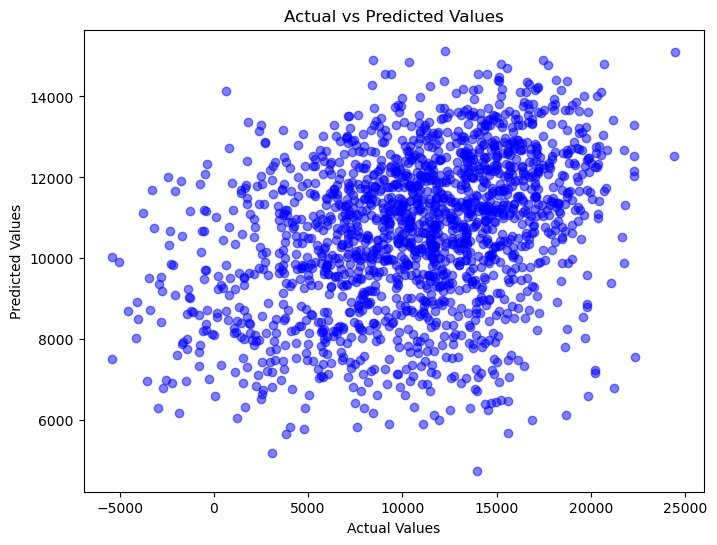

In [171]:
# Predictions on the validation data
predicted_values = linear_model.predict(x_validate)

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_validate, predicted_values, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [172]:
predicted_y_test_linear = linear_model.predict(X_standardise)

In [173]:
# Make Dataframe from predicted values
linear_pred_df = pd.DataFrame(predicted_y_test_linear, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("C:\\Users\\HP\\Downloads\\df_test.csv")

# Make Dataframe from corresponding dates
date_df_linear = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df_linear = date_df_linear.join(linear_pred_df)

#Save submission as csv
submission_df_linear.to_csv('Linear_Regression_Predictions', index=False)

submission_df_linear

time  load_shortfall_3h
0     2018-01-01 00:00:00        7955.452094
1     2018-01-01 03:00:00        6964.108685
2     2018-01-01 06:00:00        6852.353268
3     2018-01-01 09:00:00        7411.782610
4     2018-01-01 12:00:00        7785.253242
...                   ...                ...
2915  2018-12-31 09:00:00        6766.096028
2916  2018-12-31 12:00:00        7138.071670
2917  2018-12-31 15:00:00        7532.478378
2918  2018-12-31 18:00:00        7933.821153
2919  2018-12-31 21:00:00        7924.299066

[2920 rows x 2 columns]

In [174]:
#Fitting a LASSO Regression
from sklearn.linear_model import Lasso

# Create and fit the Lasso model
lasso = Lasso(alpha=1.0)  # You can tune the alpha parameter to control the strength of regularization
lasso.fit(x_train, y_train)

# Once the model is fitted, you can make predictions on the validation data
y_pred = lasso.predict(x_validate)


In [175]:
predicted_y = lasso.predict(x_validate)


In [176]:
# Calculate RMSE
rmse = metrics.mean_squared_error(y_validate, predicted_y, squared=False)

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 4978.288867904099


In [177]:
# Calculate R-squared
r_squared = r2_score(y_validate, predicted_y)

print("R-squared:", r_squared)

R-squared: 0.11999929964161216


In [178]:
# Calculate MAE
mae = mean_absolute_error(y_validate, predicted_y)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 4004.5709505806367


In [179]:
# We want to plot the train and test response variables as a continuous line
train_plot = y_train.append(pd.Series(y_validate[0], index=['2016M01']))

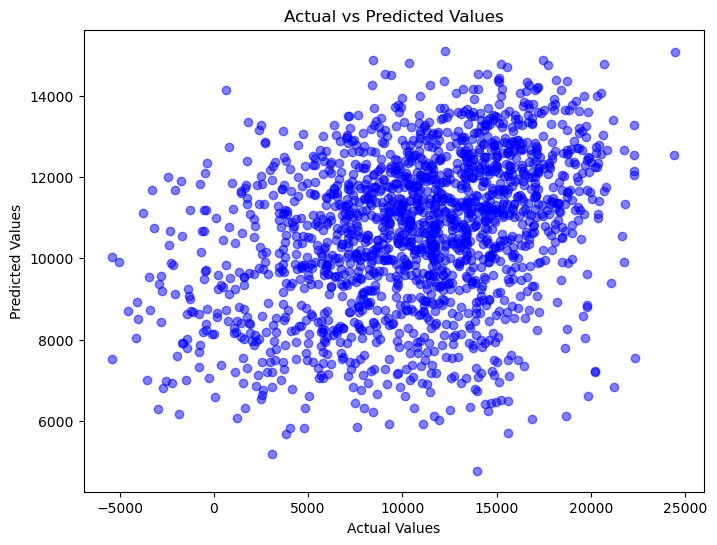

In [180]:
# Predictions on the validation data
predicted_values = lasso.predict(x_validate)

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_validate, predicted_values, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [181]:
# Find the value for the model intercept
b0_lasso = float(lasso.intercept_)
print("Intercept:", float(b0_lasso))

# Extract model coefficient values
coeff = pd.DataFrame(lasso.coef_.reshape(-1, 1), X_standardise.columns, columns=['Coefficient'])
coeff.reindex(coeff.Coefficient.abs().sort_values(ascending=False).index)


Intercept: 9158.717879739757


Coefficient
month               2196.432883
hourofday           1572.277890
day                 1530.237449
Valencia_humidity   1526.629432
year                1512.256574
Valencia_wind_deg  -1381.672664
Seville_humidity   -1240.361700
Barcelona_wind_deg -1194.978141
Bilbao_clouds_all  -1095.355924
Bilbao_wind_deg     -942.128875
Madrid_temp_min      837.912818
Madrid_pressure     -508.923347
season               475.450927
Seville_clouds_all  -318.986505
Madrid_humidity     -201.166189
Madrid_clouds_all   -100.997025

In [182]:
predicted_y_test = lasso.predict(X_standardise)


In [184]:
# Make Dataframe from predicted values
lasso_pred_df = pd.DataFrame(predicted_y_test, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("C:\\Users\\HP\\Downloads\\df_test.csv")

# Make Dataframe from corresponding dates
date_df = pd.DataFrame({'time': original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df = date_df.join(lasso_pred_df)

# Save submission as csv
submission_df.to_csv('Lasso_Regression_Predictions.csv', index=False)

submission_df


time  load_shortfall_3h
0     2018-01-01 00:00:00        7953.704376
1     2018-01-01 03:00:00        6964.191068
2     2018-01-01 06:00:00        6854.237161
3     2018-01-01 09:00:00        7420.707815
4     2018-01-01 12:00:00        7806.544605
...                   ...                ...
2915  2018-12-31 09:00:00        6796.687241
2916  2018-12-31 12:00:00        7165.476908
2917  2018-12-31 15:00:00        7555.102266
2918  2018-12-31 18:00:00        7960.901563
2919  2018-12-31 21:00:00        7952.176650

[2920 rows x 2 columns]

In [185]:
from sklearn.ensemble import RandomForestRegressor

# Our forest consists of 100 trees with a max depth of 5 in this example
RF = RandomForestRegressor(n_estimators=100, max_depth=5)
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=5)

In [189]:
from sklearn.metrics import mean_squared_error

In [190]:
# Get predictions
y_pred = RF.predict(x_validate)

# Compute RMSE
print("RMSE:", np.sqrt(mean_squared_error(y_validate, predicted_y, squared=False)))


RMSE: 70.5569902129059


RMSE: 4165.6171443042185


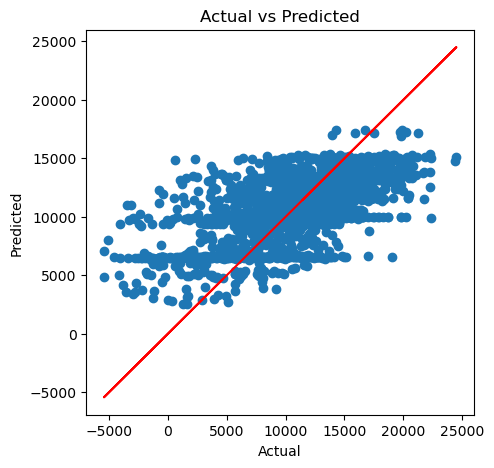

In [193]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_validate, y_pred)
ax.plot(y_validate, y_validate, 'r')

# Calculate and print RMSE
rmse = np.sqrt(mean_squared_error(y_validate, y_pred))
print("RMSE:", rmse)

plt.show()
